In [1]:
# Loading the dataset function

from dataset_functions import *
from PCA_functions import *
%matplotlib inline

In [3]:
# HSI manual dataset splitting: 33% training - 5% Validation - 56% Testing

training = [1,3,8,11,17,22,23,24,25,32,34,44,45,47,49,50,52,53]
validation = [18, 37, 42] 
testing = [2, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 26, 27, 28, 29, 30, 31, 33, 36, 38, 39, 40, 41, 43, 46, 48, 51]

# PCA Data Loading

In [22]:
# Training PCA

# Initialize empty lists to store training data
Training_PCA = []
Training_masks = []

# Iterate over training data
for i in range(126):
    """
    Load the PCA-transformed training data and corresponding segmentation masks from respective files
    """
    # Define loading path
    saving_path =  "PCBDataset/pca/train/"     # e.g.,: /home/PCBvision/PCA/train/
    
    # Construct the filename for the PCA-transformed cube
    header_file = f"{saving_path}{i}.hdr"
    # Construct file paths for PCA data and mask
    data_file = header_file[:-4]

    # Open the PCA data file and extract the PCA-transformed hyperspectral image
    numpy_ndarr = envi.open(header_file, data_file)
    c = spi.io.bipfile.BipFile.open_memmap(numpy_ndarr)
    Training_PCA.append(c)

    # Open the mask file and load the segmentation mask
    mask_file = f"{saving_path}{i}.npy"
    m = np.load(mask_file, mmap_mode='r')
    Training_masks.append(m)

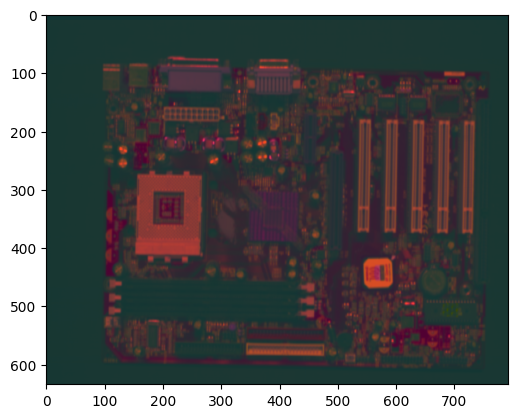

In [4]:
# PCA training data visualization
i = 52
plt.imshow(Training_PCA[i])
plt.show()
plt.figure()
visualize(Training_masks[i])

In [5]:
# Validation PCA

# Initialize empty lists to store training data
Validation_PCA = []
Validation_masks = []

# Iterate over training data
for i in range(3):
    """
    Load the PCA-transformed training data and corresponding segmentation masks from respective files
    """
    # Define loading path
    saving_path =  "PCBDataset/pca/validation/"     # e.g.,: /home/PCBvision/PCA/train/
    
    # Construct the filename for the PCA-transformed cube
    header_file = f"{saving_path}{i}.hdr"
    # Construct file paths for PCA data and mask
    data_file = header_file[:-4]

    # Open the PCA data file and extract the PCA-transformed hyperspectral image
    numpy_ndarr = envi.open(header_file, data_file)
    c = spi.io.bipfile.BipFile.open_memmap(numpy_ndarr)
    Validation_PCA.append(c)

    # Open the mask file and load the segmentation mask
    mask_file = f"{saving_path}{i}.npy"
    m = np.load(mask_file, mmap_mode='r')
    Validation_masks.append(m)

In [65]:
len(Validation_masks), len(Validation_PCA)

(3, 3)

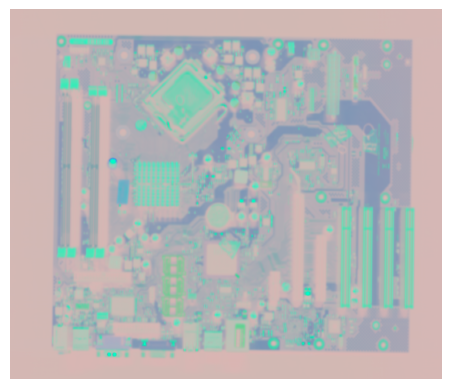

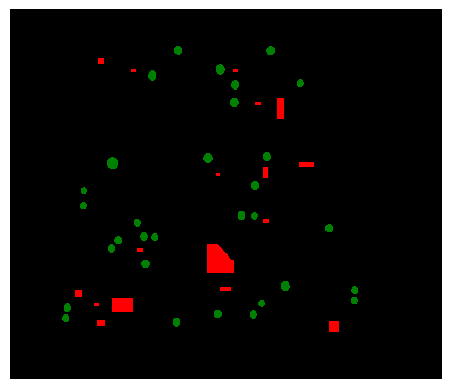

In [5]:
# PCA validation data visualization
i = 1
plt.imshow(Validation_PCA[i])
plt.figure()
visualize(Validation_masks[i])
plt.show()


In [6]:
# Validation PCA

# Initialize empty lists to store training data
Testing_PCA = []
Testing_masks = []

# Iterate over training data
for i in range(30):
    """
    Load the PCA-transformed training data and corresponding segmentation masks from respective files
    """
    # Define loading path
    saving_path =  "PCBDataset/pca/test/"     # e.g.,: /home/PCBvision/PCA/train/
    
    # Construct the filename for the PCA-transformed cube
    header_file = f"{saving_path}{i}.hdr"
    # Construct file paths for PCA data and mask
    data_file = header_file[:-4]

    # Open the PCA data file and extract the PCA-transformed hyperspectral image
    numpy_ndarr = envi.open(header_file, data_file)
    c = spi.io.bipfile.BipFile.open_memmap(numpy_ndarr)
    Testing_PCA.append(c)

    # Open the mask file and load the segmentation mask
    mask_file = f"{saving_path}{i}.npy"
    m = np.load(mask_file, mmap_mode='r')
    Testing_masks.append(m)

In [7]:
len(Testing_PCA), len(Testing_masks)

(30, 30)

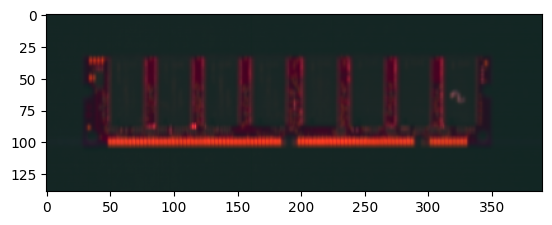

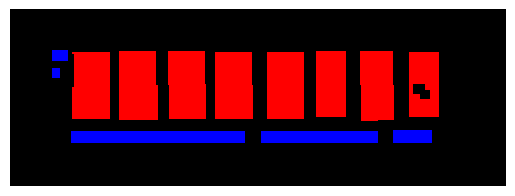

In [8]:
# PCA test data visualization
i = 1
plt.imshow(Testing_PCA[i])
plt.figure()
visualize(Testing_masks[i])
plt.show()

In [9]:
len(Training_PCA), len(Training_masks), len(Testing_PCA), len(Testing_masks),  len(Validation_PCA), len(Validation_masks)

(126, 126, 30, 30, 3, 3)

# Resizing

In [9]:
Training_PCA, Training_masks2 = resize_hyperspectral_images(Training_PCA,Training_masks,640)
Training_PCA[0].shape, Training_masks2[0].shape, Training_masks[0].shape

((640, 640, 3), (640, 640), (272, 499))

In [10]:
Validation_PCA, Validation_masks2 = resize_hyperspectral_images(Validation_PCA, Validation_masks,640)
Validation_PCA[0].shape, Validation_masks2[0].shape,Validation_masks[0].shape

((640, 640, 3), (640, 640), (370, 560))

In [11]:
Testing_PCA, Testing_masks2 = resize_hyperspectral_images(Testing_PCA, Testing_masks,640)
Testing_PCA[0].shape, Testing_masks2[0].shape, Testing_masks[0].shape

((640, 640, 3), (640, 640), (1100, 1024))

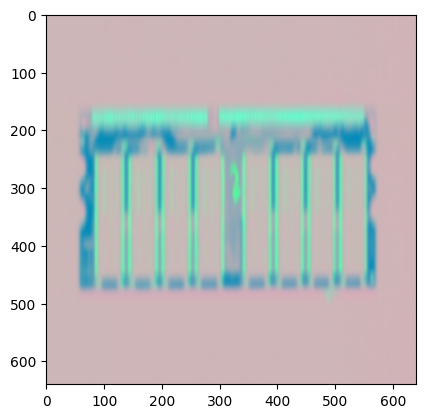

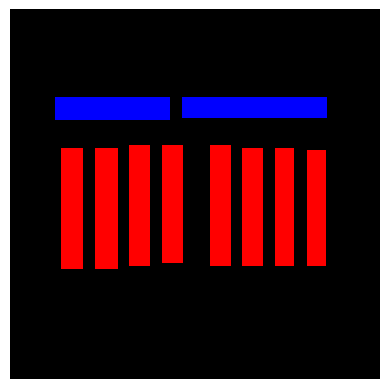

In [13]:
# Visualization after resizing 
i = 2
plt.imshow(Validation_PCA[i][:,:,:3])
plt.figure()
visualize(Validation_masks2[i])
plt.show()

# Deep Learning Part

In [12]:
# data Size check after resizing
Training_PCA[0].shape, Training_masks2[0].shape, Validation_PCA[0].shape, Validation_masks2[0].shape, Testing_PCA[0].shape, Testing_masks2[0].shape

((640, 640, 3),
 (640, 640),
 (640, 640, 3),
 (640, 640),
 (640, 640, 3),
 (640, 640))

In [13]:


class CustomDataset(Dataset):
    def __init__(self, images, masks):
        # Initialize the dataset with the input images and masks
        self.images = images
        self.masks = masks

    def __len__(self):
        # Return the length of the dataset, which is the number of input images
        return len(self.images)

    def __getitem__(self, index):
        # Retrieve the image and mask corresponding to the given index
        image = self.images[index]
        mask = self.masks[index]

        # Convert the image and mask to torch tensors
        # The `torch.from_numpy()` function converts the numpy arrays to tensors
        # The `.float()` attribute converts the tensors to floating-point format
        # The `torch.as_tensor()` function converts the mask to a long tensor
        image = torch.from_numpy(image.copy()).float()
        mask = torch.from_numpy(mask.copy()).float()
        mask = torch.as_tensor(mask, dtype=torch.long)
        
        return image, mask

In [34]:
from models.Unet import UNET
from models.Unet_Attention import AttU_Net
from models.ResUnet import ResUnet

device = set_gpu(0)

# Set up the hyperparameters and configuration
num_classes = 4  # Number of output classes
batch_size = 8  # Batch size for training
learning_rate = 0.00005  # Learning rate for the optimizer
num_epochs = 100  # Number of training epochs
patience = 20  # Number of epochs to wait for improvement before early stopping

# Define class weights to handle class imbalance
class_weights = [.1, .7, .95, .8]  # Weights for each class
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)  # Convert weights to tensors and move to device

#  Call the DL model
# model = UNET(in_channels = 3, out_channels = num_classes) # Specify input (input = Principal Component) and output channels
# model = AttU_Net(img_ch=3,output_ch=num_classes)
model = ResUnet(channel=3,out_channel=num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights,reduction='mean')  # Use the class weights in the loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Use Adam optimizer with specified learning rate

# Define training, validation, and testing sets
train_dataset = CustomDataset(Training_PCA, Training_masks2)  # Create training dataset from training patches and masks
val_dataset = CustomDataset(Validation_PCA, Validation_masks2)  # Create validation dataset from validation patches and masks
test_dataset = CustomDataset(Testing_PCA, Testing_masks2)  # Create testing dataset from testing patches and masks

# Create data loaders for each set
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)  # Configure training data loader
val_loader = DataLoader(val_dataset, batch_size=1, num_workers=0, pin_memory=True)  # Configure validation data loader
test_loader = DataLoader(test_dataset, batch_size=1, num_workers=0, pin_memory=True)  # Configure testing data loader

# Specify the path to the pre-trained weights file: Change according to the chosen model !!
path = 'General_PCA_ResUnet.pth'

In [78]:
model

UNET(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

## Training phase

In [79]:
# Training loop
epochs_without_improvement = 0

# Training loop initialization
best_epoch = 0  # Stores the epoch with the best validation loss so far
best_val_loss = float('inf')  # Stores the minimum validation loss so far

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    train_loss = 0.0  # Initialize the training loss

    # Iterate over the training batches
    for images, masks in train_loader:
        
        # Zero gradients for optimizer
        optimizer.zero_grad()

        # Move the data to GPU
        images = images.to(device)
        masks = masks.to(device)

        # Remove the channel dimension from masks
        masks = torch.squeeze(masks, dim=1)
        # Convert masks to one-hot encodings and match output shape
        masks = torch.nn.functional.one_hot(masks, num_classes)
        
        # Correct the dimension order: (batch, row, col , channel) --> (batch, channel, row, col)
        masks = masks.permute(0, 3,1,2)  # (8, 640, 640, 4) --> (8, 4, 640, 640)
        images = images.permute(0, 3,1,2)  # (8, 640, 640, 3) --> (8, 3, 640, 640)
        
        # Masks must be float
        masks = masks.type(torch.FloatTensor).to(device)
    
        # Forward pass
        outputs = model(images).to(device)
        loss = criterion(outputs, masks)

        # Backpropagation and optimization
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights
        
        # Accumulate training loss
        train_loss += loss.item()

    # Print the average training loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss / len(train_loader):.4f}")
    train_losses.append(train_loss / len(train_loader))
    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0  # Initialize the validation loss
    
    # Disable gradient calculation (not needed for validation)
    with torch.no_grad():
        for images, masks in val_loader:
            # Move the data to GPU
            images = images.to(device)
            masks = masks.type(torch.LongTensor)
            masks = masks.to(device)

            # Remove the channel dimension from masks
            masks = torch.squeeze(masks, dim=1)
            
            # Convert masks to one-hot encodings and match output shape
            masks = torch.nn.functional.one_hot(masks, num_classes)
            masks = masks.permute(0, 3, 1, 2)
            # For some reason the type has to be confirmed to float before the needed step, otherwise an error was generated
            masks = masks.type(torch.FloatTensor)

            images = images.permute(0, 3, 1, 2)

            # Forward pass
            outputs = model(images).to(device)
            
            # For some reason moving to the device has to be confirmed, otherwise an error was generated
            # Move masks to the same device as outputs
            masks = masks.to(outputs.device)
            criterion = criterion.to(device)
            
            # Calculate validation loss
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    # Print average validation loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss / len(val_loader):.4f}")
    val_losses.append(val_loss / len(val_loader))

    # Check for improvement in validation loss
    if val_loss < best_val_loss:
        # Update best validation loss and epoch
        best_val_loss = val_loss
        best_epoch = epoch

        # Reset early stopping counter
        epochs_without_improvement = 0
        
        # Save model weights
        torch.save(model.state_dict(), path)
        print(f"Best Epoch so far [{epoch+1}/{num_epochs}], Best Validation Loss so far: {val_loss / len(val_loader):.4f}")
    else:
        # Increment early stopping counter
        epochs_without_improvement += 1
    
    # Trigger early stopping if there are no improvements for `patience` epochs
    if epochs_without_improvement >= patience:
        print(f"Early stopping triggered. No improvement in {patience} epochs.")
        break

# Print best epoch and corresponding validation loss
print(f"Best Epoch: {best_epoch + 1}, Best Validation Loss: {best_val_loss / len(val_loader):.4f}")

Epoch [1/100], Train Loss: 0.1865
Epoch [1/100], Validation Loss: 0.2108
Best Epoch so far [1/100], Best Validation Loss so far: 0.2108
Epoch [2/100], Train Loss: 0.1583
Epoch [2/100], Validation Loss: 0.2984
Epoch [3/100], Train Loss: 0.1412
Epoch [3/100], Validation Loss: 0.1499
Best Epoch so far [3/100], Best Validation Loss so far: 0.1499
Epoch [4/100], Train Loss: 0.1250
Epoch [4/100], Validation Loss: 0.1347
Best Epoch so far [4/100], Best Validation Loss so far: 0.1347
Epoch [5/100], Train Loss: 0.1160
Epoch [5/100], Validation Loss: 0.1419
Epoch [6/100], Train Loss: 0.1096
Epoch [6/100], Validation Loss: 0.1226
Best Epoch so far [6/100], Best Validation Loss so far: 0.1226
Epoch [7/100], Train Loss: 0.1007
Epoch [7/100], Validation Loss: 0.1181
Best Epoch so far [7/100], Best Validation Loss so far: 0.1181
Epoch [8/100], Train Loss: 0.0957
Epoch [8/100], Validation Loss: 0.1101
Best Epoch so far [8/100], Best Validation Loss so far: 0.1101
Epoch [9/100], Train Loss: 0.0936
Epoc

loss visualization

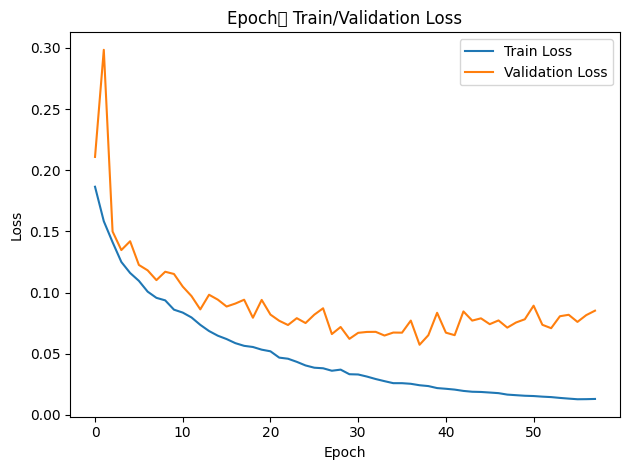

In [80]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch별 Train/Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
print("train")
print(train_losses)
print("val")
print(val_losses)

train
[0.1864665113389492, 0.15828594379127026, 0.14116619480773807, 0.12499367096461356, 0.11599485669285059, 0.1095516427885741, 0.10072794510051608, 0.09566043759696186, 0.09360727504827082, 0.08599896868690848, 0.08361019589938223, 0.07962992205284536, 0.07359411311335862, 0.06852886686101556, 0.0647136002080515, 0.06197050923947245, 0.058627285761758685, 0.05643532669637352, 0.055490229395218194, 0.05330986261833459, 0.051965058548375964, 0.04680297942832112, 0.0459036051761359, 0.04336069640703499, 0.04040833213366568, 0.038559905835427344, 0.03809950780123472, 0.03607639961410314, 0.03699539147783071, 0.03323415305931121, 0.033027904748450965, 0.03131728747393936, 0.02929887449136004, 0.027563299459870905, 0.025927039969246835, 0.02591315982863307, 0.025411411304958165, 0.024228111724369228, 0.0235485719749704, 0.02190829423489049, 0.021344975742977113, 0.020668006676714867, 0.019594301178585738, 0.018911528633907437, 0.018737709207925946, 0.018266985716763884, 0.017772019811673

## Testing phase

In [35]:
# Load the trained weights
model.load_state_dict(torch.load(path))

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the model in evaluation mode
model.eval()

# Initialize lists to store predicted masks
predicted_masks = []

# Iterate over the test images and their ground truth masks
for images, masks in test_loader:
    
    # Move the data to GPU
    images = images.to(device)  # Transfer the image data to the specified device
    masks = masks.type(torch.LongTensor)  # Convert the ground truth masks to LongTensor format
    masks = masks.to(device)  # Transfer the ground truth masks to the specified device

    # Remove the channel dimension from masks: Flatten the masks to remove the channel dimension
    masks = torch.squeeze(masks, dim=1)
            
    # To make the masks have same shape and style as the output of the model
    masks = torch.nn.functional.one_hot(masks, num_classes)  # Convert the masks to one-hot encodings
    masks = masks.permute(0, 3, 1, 2)  # Transpose the masks to match the expected output shape
    images = images.permute(0, 3, 1, 2)  # Transpose the images to match the expected input shape
    masks = masks.type(torch.FloatTensor)  # Convert the masks to FloatTensor format
    
    # Perform inference
    with torch.no_grad():  # Forward pass the images through the model to obtain the predictions
        output = model(images)  # Forward pass the images through the model to obtain the predictions 

    # Remove batch dimension
    output = torch.squeeze(output, dim=0)  # (1, 4, 640, 640) --> (4, 640, 640)
    output = torch.nn.functional.softmax(output, dim=0)
    output = torch.argmax(output, dim=0)
    
    # Transfer the output to CPU memory and convert it to a numpy array
    predicted_mask = output.cpu().numpy()

    # Append the predicted mask to the list
    predicted_masks.append(predicted_mask)

In [30]:
# Size & Dimension Checks
len(predicted_masks),len(Testing_masks2), predicted_masks[0].shape, Testing_masks2[0].shape

(30, 30, (640, 640), (640, 640))

ResUnet(
  13.04 M, 100.000% Params, 506.19 GMac, 99.945% MACs, 
  (input_layer): Sequential(
    38.85 k, 0.298% Params, 15.94 GMac, 3.147% MACs, 
    (0): Conv2d(1.79 k, 0.014% Params, 734.0 MMac, 0.145% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, 0.001% Params, 52.43 MMac, 0.010% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(0, 0.000% Params, 26.21 MMac, 0.005% MACs, )
    (3): Conv2d(36.93 k, 0.283% Params, 15.13 GMac, 2.987% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (input_skip): Sequential(
    1.79 k, 0.014% Params, 734.0 MMac, 0.145% MACs, 
    (0): Conv2d(1.79 k, 0.014% Params, 734.0 MMac, 0.145% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (residual_conv_1): ResidualConv(
    295.94 k, 2.269% Params, 30.38 GMac, 5.999% MACs, 
    (conv_block): Sequential(
      221.82 k, 1.701% Params, 22.79 GMac, 4.500% MACs, 
      (0): BatchNorm2d(12

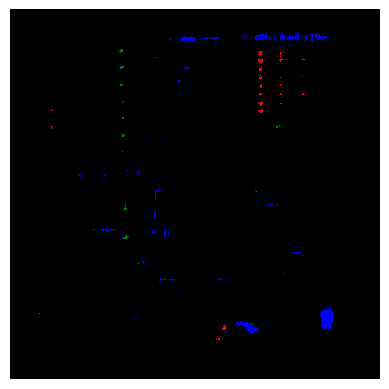

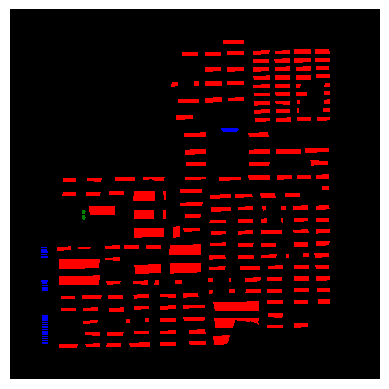

(0.0, 1.0, 0.0, 1.0)

In [36]:
from ptflops import get_model_complexity_info

flops, params = get_model_complexity_info(model, (3, 640, 640))
print(flops)
print(params)

visualize(predicted_masks[0])
plt.axis('off')
plt.figure()
visualize(Testing_masks2[0])
plt.show()
plt.axis('off')





## Evaluation phase

In [37]:
# Resize predicted masks to original shape
predicted_masks2 = []

for i, m in enumerate(predicted_masks):
    """
    Resize each predicted mask to the original size of its corresponding ground truth mask.

    Parameters:
        i (int): Index of the current mask
        m (numpy.ndarray): Predicted mask
        Testing_masks[i] (numpy.ndarray): Corresponding ground truth mask
    """

    # Resize the predicted mask using the dimensions of the ground truth mask
    predicted_masks2.append(resize_segmentation_masks(m, Testing_masks[i].shape))

print(predicted_masks2[0].shape, Testing_masks[0].shape)  # Print the shape of the resized and original masks

(1100, 1024) (1100, 1024)


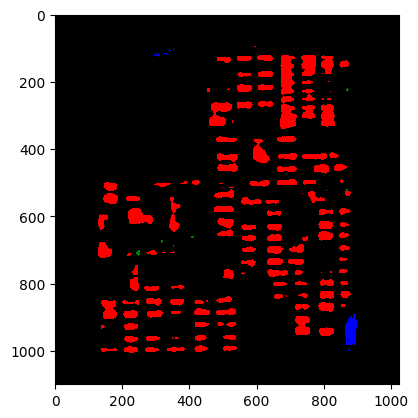

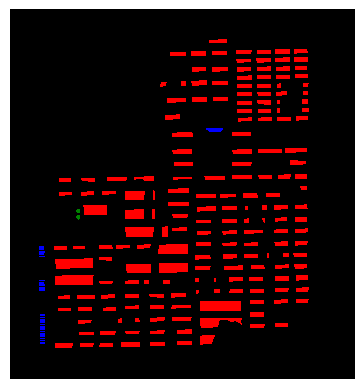

(0.0, 1.0, 0.0, 1.0)

In [20]:
# visualize(predicted_masks2[0])
# plt.axis('on')
# plt.figure()
# visualize(Testing_masks[0])
# plt.show()
# plt.axis('on')


In [38]:
# Convert the list to a numpy array
predicted_masks = np.array(predicted_masks)

# Call the evaluate_segmentation function
confusion_matrix_sum, true_positive_sum, true_negative_sum, false_positive_sum, false_negative_sum, precision, recall, f1_score, pixel_accuracy_per_class, pixel_accuracy, iou, dice_coefficient, kappa = evaluate_segmentation(Testing_masks2, predicted_masks, num_classes)

# Print the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix_sum)
print("Pixel Accuracy:")
print(pixel_accuracy)
print("Precision:")
print(precision)
print("Recall:")
print(recall)
print("F1 Score:")
print(f1_score)
print("Intersection over Union (IoU):")
print(iou)
print("Dice Coefficient:")
print(dice_coefficient)
print("Kappa Coefficient:")
print(kappa)


Confusion Matrix:
[[10914309   150149    44275   162354]
 [  695763   150903     3577    12360]
 [   20805       55    10561      340]
 [  105685      500      538    15826]]
Pixel Accuracy:
0.9026366373697917
Precision:
[0.9299409  0.5003299  0.17914878 0.08291073]
Recall:
[0.96834573 0.17493911 0.33251472 0.12914018]
F1 Score:
[0.94875482 0.25923674 0.23284681 0.10098619]
Intersection over Union (IoU):
[0.90250576 0.1489213  0.1317638  0.05317823]
Dice Coefficient:
[0.94875482 0.25923674 0.23284681 0.10098619]
Kappa Coefficient:
[0.43413954 0.89604994 0.90240895 0.90175221]
